# LowLou Metric

In [ ]:
import pyvista as pv
import matplotlib.pyplot as plt

In [ ]:
b_vtk_path = '01_input/lowlou_128128128/b.vtk'
b_mesh = pv.read(b_vtk_path)
Nx, Ny, Nz = b_mesh.dimensions
b_mesh

StructuredGrid (0x7fcce40a7700)
  N Cells:      2048383
  N Points:     2097152
  X Bounds:     0.000e+00, 1.270e+02
  Y Bounds:     0.000e+00, 1.270e+02
  Z Bounds:     0.000e+00, 1.270e+02
  Dimensions:   128, 128, 128
  N Arrays:     2

In [ ]:
total_iter = 10000

In [ ]:
B_pinn_vtk_path = f'03_eval/lowlou_128128128/PINN/B_pinn_{total_iter}.vtk'
B_pinn_mesh = pv.read(B_pinn_vtk_path)
B_pinn_mesh

ImageData (0x7fccde227400)
  N Cells:      2048383
  N Points:     2097152
  X Bounds:     0.000e+00, 1.270e+02
  Y Bounds:     0.000e+00, 1.270e+02
  Z Bounds:     0.000e+00, 1.270e+02
  Dimensions:   128, 128, 128
  Spacing:      1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:     2

In [ ]:
B_spinn_vtk_path = f'03_eval/lowlou_128128128/SPINN/B_spinn_{total_iter}.vtk'
B_spinn_mesh = pv.read(B_spinn_vtk_path)
B_spinn_mesh

StructuredGrid (0x7fccde2273a0)
  N Cells:      2048383
  N Points:     2097152
  X Bounds:     0.000e+00, 1.270e+02
  Y Bounds:     0.000e+00, 1.270e+02
  Z Bounds:     0.000e+00, 1.270e+02
  Dimensions:   128, 128, 128
  N Arrays:     2

In [ ]:
b_pot_vtk_path = '01_input/lowlou_128128128/b_pot.vtk'

## Calculate Potential field

### get ndarray

<matplotlib.image.AxesImage>

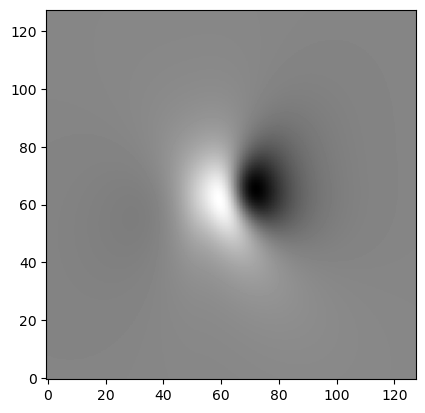

In [ ]:
b = b_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
bz_bottom = b[:, :, 0, 2]
plt.imshow(bz_bottom.transpose(), origin='lower', cmap='gray')

In [ ]:
B_pinn = B_pinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
plt.imshow(B_pinn[:, :, 0, 2].transpose(), origin='lower', cmap='gray')

NameError: name 'B_pinn_mesh' is not defined

<matplotlib.image.AxesImage>

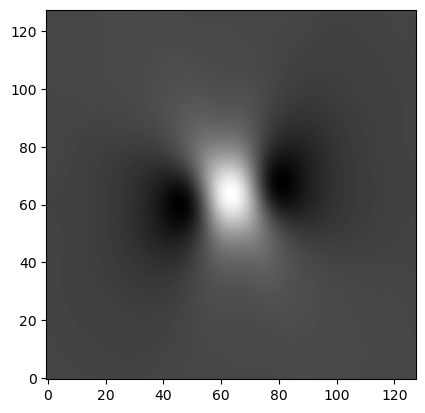

In [ ]:
B_spinn = B_spinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
plt.imshow(B_spinn[:, :, 0, 2].transpose(), origin='lower', cmap='gray')

### vtk

In [ ]:
from nf2.potential.potential_field import get_potential_field
from zpinn.pinn_nf2_cleanup import create_coordinates
import numpy as np 

In [ ]:
b_pot = get_potential_field(bz_bottom, Nz)

Potential Field: 100%|██████████| 1024/1024 [00:13<00:00, 74.40it/s]


In [ ]:
Bx = b_pot[..., 0]
By = b_pot[..., 1]
Bz = b_pot[..., 2]

co_bounds = (0, Nx-1, 0, Ny-1, 0, Nz-1)
co_coords = create_coordinates(co_bounds).reshape(-1, 3)
co_coord = co_coords.reshape(Nx, Ny, Nz, 3)
x = co_coord[..., 0]
y = co_coord[..., 1]
z = co_coord[..., 2]
mesh = pv.StructuredGrid(x, y, z)
vectors = np.stack([Bx, By, Bz], axis=-1).transpose(2, 1, 0, 3).reshape(-1, 3)
mesh['B'] = vectors
mesh.active_vectors_name = 'B'
magnitude = np.linalg.norm(vectors, axis=-1)
mesh['mag'] = magnitude
mesh.active_scalars_name = 'mag'

mesh

StructuredGrid (0x7f55bb9db580)
  N Cells:      2048383
  N Points:     2097152
  X Bounds:     0.000e+00, 1.270e+02
  Y Bounds:     0.000e+00, 1.270e+02
  Z Bounds:     0.000e+00, 1.270e+02
  Dimensions:   128, 128, 128
  N Arrays:     2

In [ ]:
mesh.save(b_pot_vtk_path)

<matplotlib.image.AxesImage>

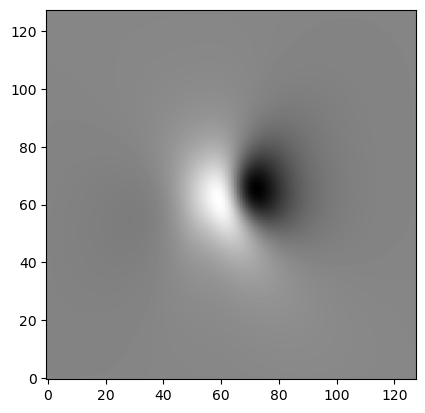

In [ ]:
b_pot = mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
plt.imshow(b_pot[:, :, 0, 2].transpose(), origin='lower', cmap='gray')

## Viz

In [ ]:
from zpinn.pinn_nf2_visualization import draw_grid

In [ ]:
vmin = -200
vmax = 200

In [ ]:
pv.start_xvfb()
pv.global_theme.trame.server_proxy_enabled = True
pv.set_jupyter_backend('static')

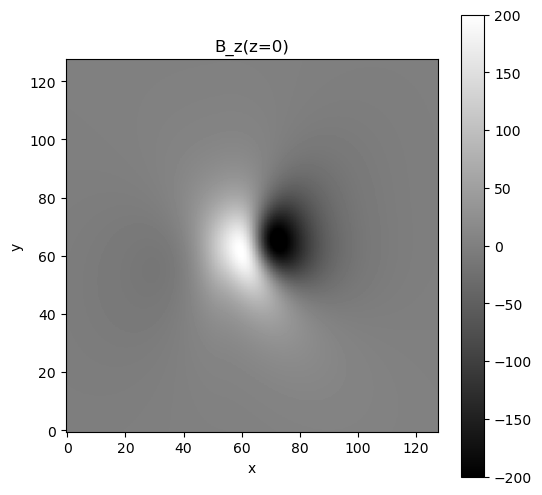

In [ ]:
draw_grid(b_mesh).plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax)

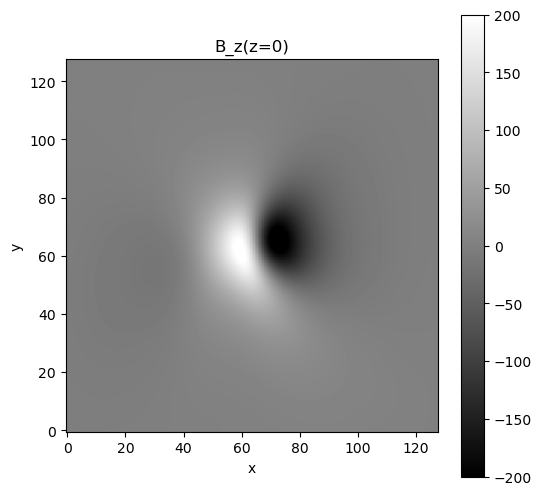

In [ ]:
draw_grid(B_pinn_mesh).plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax)

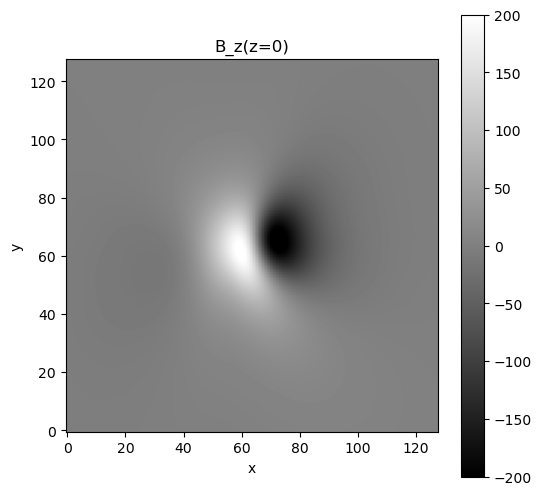

In [ ]:
draw_grid(B_spinn_mesh).plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax)

In [ ]:
b_pot_mesh = pv.read(b_pot_vtk_path)

In [ ]:
b_pot_grid = draw_grid(b_pot_mesh)

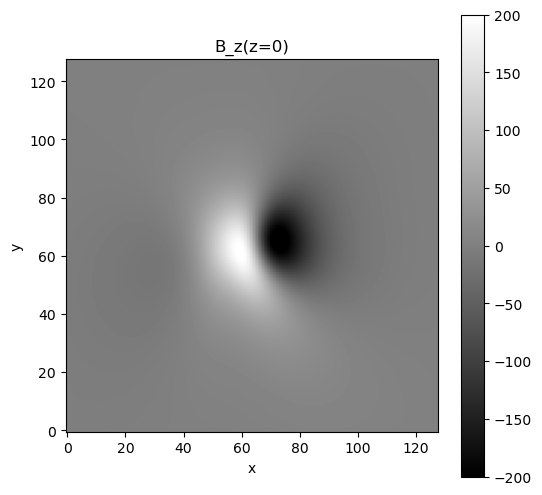

In [ ]:
b_pot_grid.plt_Bz_imshow(z=0, vmin=vmin, vmax=vmax)

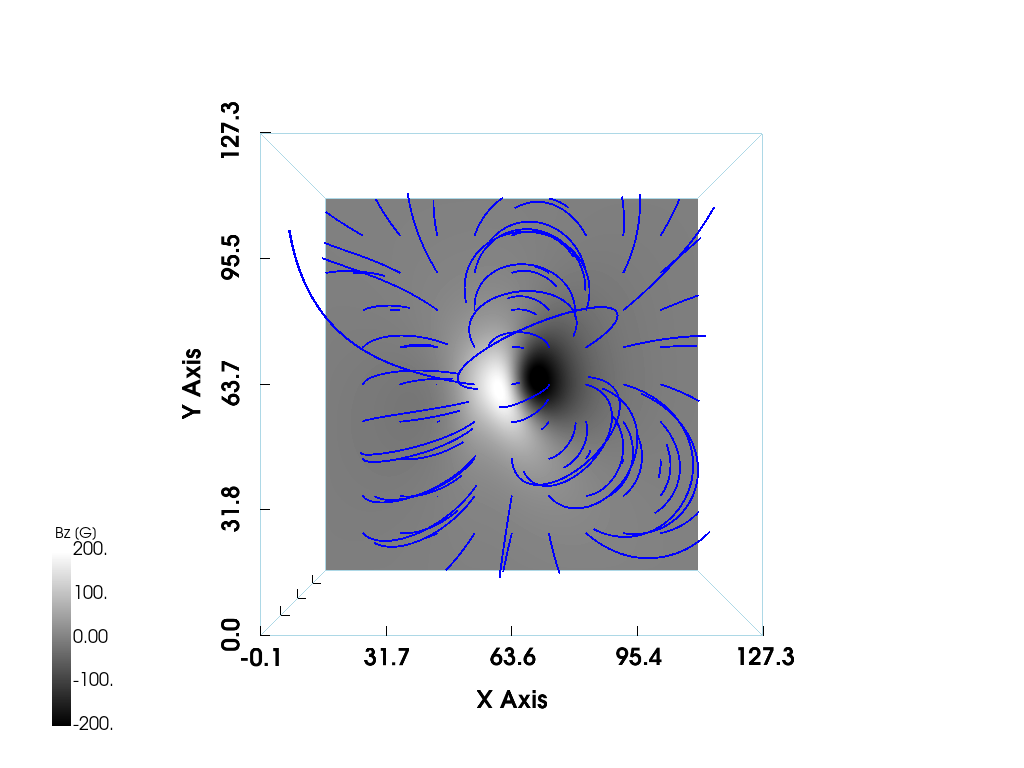

In [ ]:
b_pot_grid.pv_streamline_Bz(camera_position='xy', i_resolution=10, j_resolution=10, vmin=vmin, vmax=vmax)

## Evaluate metric

In [ ]:
import pandas as pd
from zpinn.pinn_nf2_metric import metric_df

In [ ]:
b_pot_mesh = pv.read(b_pot_vtk_path)

In [ ]:
b = b_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
b_pot = b_pot_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)

In [ ]:
B_pinn = B_pinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)
B_spinn = B_spinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)

In [ ]:
df_b = metric_df(B=b, b=b, B_potential=b_pot, iteration='Low Lou')
df_bp = metric_df(B=b_pot, b=b, B_potential=b_pot, iteration='Potential')
df = pd.concat([df_b, df_bp], ignore_index=True)
df

,iteration,C_vec,C_cs,1-En,1-Em,eps,eps_p,sig_J,L1,L2,curlB
0,Low Lou,1.000000,1.000000,1.000000,1.000000,1.000000,1.546734,0.167237,2.293096e-02,0.059108,1.000000e+00
1,Potential,0.869707,0.835765,0.443058,0.349317,0.646524,1.000000,0.831155,1.249630e-12,0.072553,6.037842e-07


In [ ]:
df_new = metric_df(B=B_pinn, b=b, B_potential=b_pot, iteration=f'pinn [{total_iter}]')
df = pd.concat([df, df_new], ignore_index=True)
df

,iteration,C_vec,C_cs,1-En,1-Em,eps,eps_p,sig_J,L1,L2,curlB
0,Low Lou,1.000000,1.000000,1.000000,1.000000,1.000000,1.546734,0.167237,2.293096e-02,0.059108,1.000000e+00
1,Potential,0.869707,0.835765,0.443058,0.349317,0.646524,1.000000,0.831155,1.249630e-12,0.072553,6.037842e-07
2,pinn [10000],0.988070,0.697509,0.693516,0.341856,0.910871,1.408875,0.298446,2.124412e-02,0.010859,9.828033e-01


In [ ]:
df_new = metric_df(B=B_spinn, b=b, B_potential=b_pot, iteration=f'spinn [{total_iter}]')
df = pd.concat([df, df_new], ignore_index=True)
df

,iteration,C_vec,C_cs,1-En,1-Em,eps,eps_p,sig_J,L1,L2,curlB
0,Low Lou,1.000000,1.000000,1.000000,1.000000,1.000000,1.546734,0.167237,2.293096e-02,0.059108,1.000000e+00
1,Potential,0.869707,0.835765,0.443058,0.349317,0.646524,1.000000,0.831155,1.249630e-12,0.072553,6.037842e-07
2,pinn [10000],0.988070,0.697509,0.693516,0.341856,0.910871,1.408875,0.298446,2.124412e-02,0.010859,9.828033e-01
3,spinn [10000],0.990632,0.927239,0.746156,0.520348,0.873247,1.350681,0.048803,3.498274e-04,0.000299,8.357760e-01


## Multi metric

In [ ]:
import os
import numpy as np

In [ ]:
iterations = np.arange(1000, 10001, 1000)

In [ ]:
df_b = metric_df(B=b, b=b, B_potential=b_pot, iteration='Low Lou')
df_bp = metric_df(B=b_pot, b=b, B_potential=b_pot, iteration='Potential')
df = pd.concat([df_b, df_bp], ignore_index=True)
df

,iteration,C_vec,C_cs,1-En,1-Em,eps,eps_p,sig_J,L1,L2,curlB
0,Low Lou,1.000000,1.000000,1.000000,1.000000,1.000000,1.546734,0.167237,2.293096e-02,0.059108,1.000000e+00
1,Potential,0.869707,0.835765,0.443058,0.349317,0.646524,1.000000,0.831155,1.249630e-12,0.072553,6.037842e-07


In [ ]:
for epo in iterations:
    output_path = '02_output/lowlou_128128128'
    eval_path = '03_eval/lowlou_128128128'

    B_pinn_vtk_path = os.path.join(eval_path, f'PINN/B_pinn_{epo}.vtk')
    B_pinn_mesh = pv.read(B_pinn_vtk_path)
    B_pinn = B_pinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)

    df_new = metric_df(B=B_pinn, b=b, B_potential=b_pot, iteration=f'PINN [{epo}]')
    df = pd.concat([df, df_new], ignore_index=True)

    B_spinn_vtk_path = os.path.join(eval_path, f'SPINN/B_spinn_{epo}.vtk')
    B_spinn_mesh = pv.read(B_spinn_vtk_path)
    B_spinn = B_spinn_mesh['B'].reshape(Nz, Ny, Nx, 3).transpose(2, 1, 0, 3)

    df_new = metric_df(B=B_spinn, b=b, B_potential=b_pot, iteration=f'SPINN [{epo}]')
    df = pd.concat([df, df_new], ignore_index=True)

In [ ]:
df

,iteration,C_vec,C_cs,1-En,1-Em,eps,eps_p,sig_J,L1,L2,curlB
0,Low Lou,1.000000,1.000000,1.000000,1.000000,1.000000,1.546734,0.167237,2.293096e-02,0.059108,1.000000e+00
1,Potential,0.869707,0.835765,0.443058,0.349317,0.646524,1.000000,0.831155,1.249630e-12,0.072553,6.037842e-07
2,PINN [1000],0.647795,0.538271,-1.936422,-5.446789,6.046396,9.352166,0.724236,2.948891e+00,2.826031,6.908263e+00
3,SPINN [1000],0.988519,0.924714,0.731992,0.534578,0.834889,1.291351,0.140695,1.520974e-03,0.000845,8.536631e-01
4,PINN [2000],0.848170,0.485522,-0.329214,-1.927207,2.453038,3.794197,0.682255,1.114437e+00,1.166184,3.432798e+00
5,SPINN [2000],0.990246,0.936577,0.742285,0.540915,0.839873,1.299060,0.089844,6.105922e-04,0.000289,8.289557e-01
6,PINN [3000],0.926420,0.433780,0.294754,-0.560587,1.068550,1.652762,0.644882,2.694099e-01,0.356337,1.953829e+00
7,SPINN [3000],0.991281,0.939553,0.752380,0.548316,0.850332,1.315237,0.069795,4.217466e-04,0.000156,8.418711e-01
8,PINN [4000],0.954666,0.372070,0.458442,-0.231404,0.859990,1.330176,0.587799,1.025785e-01,0.122534,1.481318e+00
9,SPINN [4000],0.991331,0.932024,0.750416,0.536934,0.853671,1.320402,0.061926,3.636917e-04,0.000130,8.370221e-01


In [ ]:
df.to_csv('03_eval/lowlou_128128128/metric.csv', index=False)